# Multiclass classification model using a custom CNN in TensorFlow. 

### Problem statement: 
To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution that can evaluate images and alert dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

Steps to be followed:
- Import Libraries to analyze and build deep learning CNN model.
- Data Preparation and Visualization.
- Build base model.
- Rectify class imbalanced problem(overfitting) with Augmentor.
- Modify CNN architecture and rebuild the model.
- Prediction on Test dataset.

### Importing Libraries

In [2]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np

import os
import shutil
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import Augmentor

from keras.models import Sequential
from keras.layers import Dense, Flatten, MaxPooling2D, Conv2D,Dropout, BatchNormalization
from keras.optimizers import Adam, Adagrad, RMSprop

### Data Preparation and Visualization

In [3]:
# reshape the images to (180,180) on (0-255) scale with batch size of 32

train_datagen = ImageDataGenerator(
        rescale=1./255,)

X_train = train_datagen.flow_from_directory(
        './SkinCancer/Train/',
        target_size=(180,180),
        batch_size=32,
        class_mode='categorical')

Found 2239 images belonging to 9 classes.


In [4]:
imgs, labels = next(X_train)

In [5]:
# list of classes
class_list = os.listdir('./SkinCancer/Train/')

In [6]:
imges_ = []
for class_ in os.listdir('./SkinCancer/Train/'):
    print(class_)
    img = os.listdir(f'./SkinCancer/Train/{class_}')[0]
    imges_.append(img)


actinic keratosis
basal cell carcinoma
dermatofibroma
melanoma
nevus
pigmented benign keratosis
seborrheic keratosis
squamous cell carcinoma
vascular lesion


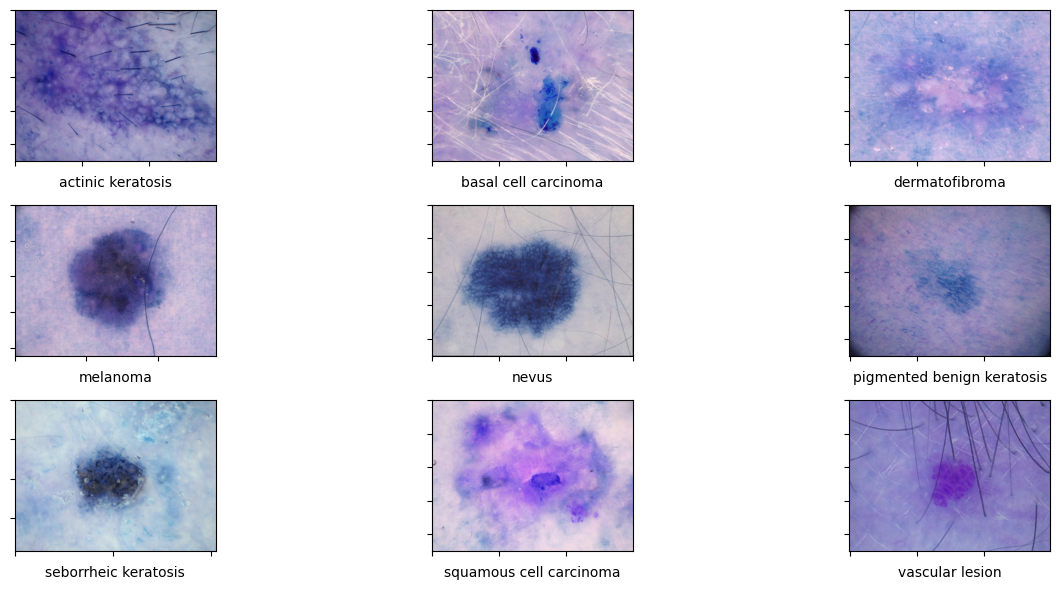

In [6]:


cols = 3
rows = 3
fig = plt.figure(figsize= (14,6))
for i, col in enumerate(class_list):
    
    ax=fig.add_subplot(rows, cols, i+1)
    img = cv2.imread(f'./SkinCancer/Train/{class_list[i]}/{imges_[i]}')
    plt.imshow(img)
    # ax.axis('off')
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])
    plt.xlabel(class_list[i])
fig.tight_layout()
  
plt.show()

### Base CNN Model

In [16]:
# base CNN architecture
model_base = Sequential()

model_base.add(Conv2D(filters= 32, kernel_size=(3,3), activation='relu', padding='same', input_shape=imgs[0].shape))
model_base.add(MaxPooling2D(pool_size=(2,2), strides=2))

model_base.add(Flatten())
model_base.add(Dense(64, activation='relu'))
model_base.add(Dense(9, activation='softmax'))



In [17]:
model_base.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 259200)            0         
                                                                 
 dense_8 (Dense)             (None, 64)                16588864  
                                                                 
 dense_9 (Dense)             (None, 9)                 585       
                                                                 
Total params: 16,590,345
Trainable params: 16,590,345
Non-trainable params: 0
__________________________________________

In [18]:
model_base.compile(optimizer=Adam(learning_rate=0.001), loss='CategoricalCrossentropy', metrics=['accuracy'])

In [19]:
hist_base = model_base.fit(x=X_train, epochs=5, verbose=2)

Epoch 1/5
70/70 - 48s - loss: 5.8016 - accuracy: 0.1157 - 48s/epoch - 684ms/step
Epoch 2/5
70/70 - 36s - loss: 2.0574 - accuracy: 0.2121 - 36s/epoch - 518ms/step
Epoch 3/5
70/70 - 35s - loss: 1.9971 - accuracy: 0.2046 - 35s/epoch - 504ms/step
Epoch 4/5
70/70 - 38s - loss: 1.9525 - accuracy: 0.2175 - 38s/epoch - 546ms/step
Epoch 5/5
70/70 - 38s - loss: 1.9111 - accuracy: 0.2331 - 38s/epoch - 540ms/step


### Handle Data imbalance

In [7]:
import pandas as pd
import seaborn as sns

class_data = pd.DataFrame({'class': [class_ for class_ in os.listdir('./SkinCancer/Train/')], 
                           'records_count': [len(os.listdir(f'./SkinCancer/Train/{class_}')) for class_ in os.listdir('./SkinCancer/Train/')]})


<AxesSubplot: xlabel='records_count', ylabel='class'>

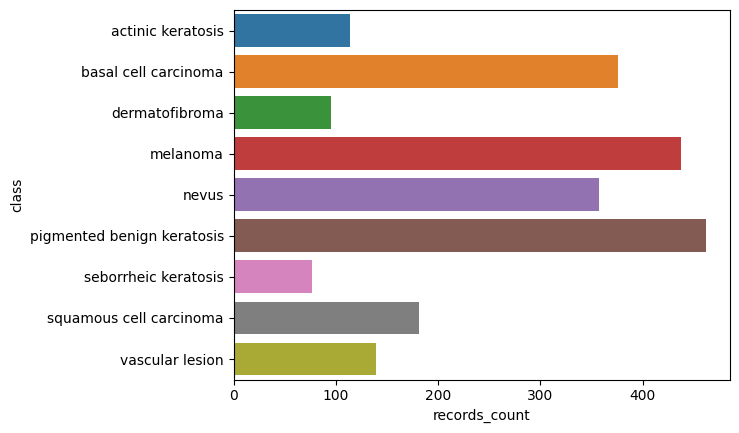

In [87]:

sns.barplot(class_data, y =class_data['class'],x=class_data['records_count'] )

In [8]:
src_dir = './SkinCancer/Train/'
des_dir = './SkinCancer/aug_data/'

In [9]:
# get the count of each class instance(images)
records_count = [len(os.listdir(f'{src_dir}{class_}')) for class_ in os.listdir(src_dir)]

# get the min/max size
min_class_size = min(records_count)
max_class_size = max(records_count)

- #### Data Augmentation using ``Augmentor`` library

In [63]:
# data Augmentation for those classes/Categories whose count less than max_size

for class_ in os.listdir(src_dir):    
    if len(os.listdir(f'{src_dir}{class_}')) < max_class_size:
        p = Augmentor.Pipeline(os.path.join(src_dir, class_) )
        p.rotate(probability=0.5, max_left_rotation=10, max_right_rotation=10)
        p.skew_tilt(probability=0.4)
        p.zoom(probability=0.5, min_factor=1.1, max_factor=1.5)
        p.random_distortion(probability=0.5, grid_width=4, grid_height=4, magnitude=5)
        p.sample(max_class_size - len(os.listdir(f'{src_dir}{class_}')))

Initialised with 114 image(s) found.
Output directory set to ./SkinCancer/Train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1A881B889D0>: 100%|██████████| 347/347 [00:03<00:00, 103.98 Samples/s]                  


Initialised with 376 image(s) found.
Output directory set to ./SkinCancer/Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1A881BC8940>: 100%|██████████| 85/85 [00:00<00:00, 107.07 Samples/s]                  


Initialised with 95 image(s) found.
Output directory set to ./SkinCancer/Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1A881C03730>: 100%|██████████| 366/366 [00:03<00:00, 109.25 Samples/s]                  


Initialised with 438 image(s) found.
Output directory set to ./SkinCancer/Train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1A881BAFD90>: 100%|██████████| 23/23 [00:01<00:00, 12.62 Samples/s]                 


Initialised with 357 image(s) found.
Output directory set to ./SkinCancer/Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x1A881C0C250>: 100%|██████████| 104/104 [00:05<00:00, 17.83 Samples/s]                 


Initialised with 77 image(s) found.
Output directory set to ./SkinCancer/Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1A881E9A640>: 100%|██████████| 384/384 [00:08<00:00, 43.06 Samples/s]                  


Initialised with 181 image(s) found.
Output directory set to ./SkinCancer/Train/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1A8F33BBEB0>: 100%|██████████| 280/280 [00:03<00:00, 86.20 Samples/s]                   


Initialised with 139 image(s) found.
Output directory set to ./SkinCancer/Train/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1A881BCBAC0>: 100%|██████████| 322/322 [00:03<00:00, 97.45 Samples/s]                   


In [65]:
# let's make new directory to store augmented images

for class_ in os.listdir(src_dir):   
   for root, dirs, files in os.walk(os.path.join(src_dir,class_)):
      for file in files:
        src_p = os.path.join(root, file)
        des_p = os.path.join(des_dir, class_)
        if not os.path.exists(des_p):
            os.makedirs(f'{des_dir}{class_}')
        else:
            des_p = os.path.join(des_dir, class_)
        shutil.copy(src_p, des_p)

In [69]:
# make DataFrmae to visualize size of each Category after performing data upsampling using Augmentation.

bal_data = pd.DataFrame({'class': [class_ for class_ in os.listdir('./SkinCancer/aug_data/')], 
                           'records_count': [len(os.listdir(f'./SkinCancer/aug_data/{class_}')) for class_ in os.listdir('./SkinCancer/aug_data/')]})

In [70]:
bal_data

,class,records_count
0,actinic keratosis,461
1,basal cell carcinoma,461
2,dermatofibroma,461
3,melanoma,461
4,nevus,461
5,pigmented benign keratosis,462
6,seborrheic keratosis,461
7,squamous cell carcinoma,461
8,vascular lesion,461


- In that way we are able to manage imbalanced dataset.

#### Let's split Train, Test and Validation Dataset

In [4]:
bal_data_generator = ImageDataGenerator(rescale=1./255,                                        
                                     validation_split=0.2)

train_generator = bal_data_generator.flow_from_directory('./SkinCancer/aug_data/', target_size=(180,180), shuffle=True, seed=13,
                                                     class_mode='categorical', batch_size=32, subset="training")

validation_generator = bal_data_generator.flow_from_directory('./SkinCancer/aug_data/', target_size=(180,180), shuffle=True, seed=13,
                                                     class_mode='categorical', batch_size=32, subset="validation")
        
   

Found 3322 images belonging to 9 classes.
Found 828 images belonging to 9 classes.


### Model_1

In [72]:
model1 = Sequential()

model1.add(Conv2D(filters= 32, kernel_size=(3,3), activation='relu', padding='same', input_shape=imgs[0].shape))
model1.add(MaxPooling2D(pool_size=(2,2), strides=2))

model1.add(Conv2D(filters= 32, kernel_size=(3,3), activation='relu', padding='same'))
model1.add(MaxPooling2D(pool_size=(2,2), strides=2))


model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dense(18, activation='relu'))
model1.add(Dense(9, activation='softmax'))

In [73]:
model1.compile(optimizer=Adam(learning_rate=0.001), loss='CategoricalCrossentropy', metrics=['accuracy'])

In [76]:
model1.fit_generator(train_generator,epochs=5 ,validation_data= validation_generator)

C:\Users\chirag\AppData\Local\Temp\ipykernel_1896\1388710381.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model1.fit_generator(train_generator,epochs=5 ,validation_data= validation_generator)


Epoch 1/5
104/104 [==============================] - 105s 1s/step - loss: 2.2190 - accuracy: 0.1252 - val_loss: 2.1758 - val_accuracy: 0.1461
Epoch 2/5
104/104 [==============================] - 83s 793ms/step - loss: 2.0586 - accuracy: 0.2219 - val_loss: 2.0195 - val_accuracy: 0.2790
Epoch 3/5
104/104 [==============================] - 79s 758ms/step - loss: 1.7554 - accuracy: 0.3462 - val_loss: 1.6530 - val_accuracy: 0.3732
Epoch 4/5
104/104 [==============================] - 83s 803ms/step - loss: 1.4409 - accuracy: 0.4675 - val_loss: 1.6071 - val_accuracy: 0.4336
Epoch 5/5
104/104 [==============================] - 87s 839ms/step - loss: 1.2957 - accuracy: 0.5217 - val_loss: 1.6442 - val_accuracy: 0.4263


In [23]:
# model 2 CNN architecture

model2 = Sequential()

model2.add(Conv2D(filters= 64, kernel_size=(3,3), activation='relu', padding='same', input_shape=imgs[0].shape))
model2.add(MaxPooling2D(pool_size=(2,2), strides=2))
# model2.add(BatchNormalization())

model2.add(Conv2D(filters= 32, kernel_size=(3,3), activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(2,2), strides=2))
# model2.add(BatchNormalization())

model2.add(Flatten())
model2.add(Dense(228, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(9, activation='softmax'))

In [24]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 180, 180, 64)      1792      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 90, 90, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 90, 90, 32)        18464     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 64800)             0         
                                                                 
 dense_15 (Dense)            (None, 228)              

In [25]:
model2.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['accuracy'])

In [26]:
model2.fit_generator(train_generator,epochs=30 ,validation_data= validation_generator)

C:\Users\chirag\AppData\Local\Temp\ipykernel_3988\296517728.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model2.fit_generator(train_generator,epochs=30 ,validation_data= validation_generator)


Epoch 1/30
104/104 [==============================] - 139s 1s/step - loss: 2.2741 - accuracy: 0.1409 - val_loss: 2.1447 - val_accuracy: 0.1800
Epoch 2/30
104/104 [==============================] - 145s 1s/step - loss: 1.9432 - accuracy: 0.2631 - val_loss: 1.8852 - val_accuracy: 0.2572
Epoch 3/30
104/104 [==============================] - 136s 1s/step - loss: 1.6049 - accuracy: 0.3895 - val_loss: 1.7891 - val_accuracy: 0.3804
Epoch 4/30
104/104 [==============================] - 154s 1s/step - loss: 1.4319 - accuracy: 0.4539 - val_loss: 1.6881 - val_accuracy: 0.4384
Epoch 5/30
104/104 [==============================] - 138s 1s/step - loss: 1.3474 - accuracy: 0.5084 - val_loss: 1.6735 - val_accuracy: 0.4783
Epoch 6/30
104/104 [==============================] - 142s 1s/step - loss: 1.1333 - accuracy: 0.5843 - val_loss: 1.9855 - val_accuracy: 0.4457
Epoch 7/30
104/104 [==============================] - 141s 1s/step - loss: 1.1044 - accuracy: 0.6033 - val_loss: 1.8896 - val_accuracy: 0.4891

### Keras-hyperparameter Tunning

In [5]:
import keras_tuner as kt

In [6]:
def build_model(hp):

  model = keras.Sequential()
  model.add(Conv2D(filters= hp.Int('filter_', min_value=32, max_value=128, step=8),
                   kernel_size=hp.Choice('kernal_', values=[3,5]),
                   activation='relu',
                   padding='same',
                   input_shape = (180,180,3)))
  model.add(MaxPooling2D(
                    pool_size= (2,2),
                    strides= hp.Choice('Stride_', values=[2,3,4])))
  model.add(BatchNormalization())
  model.add(Conv2D(filters= hp.Int('filter_', min_value=16, max_value=64, step=8),
                   kernel_size=hp.Choice('kernal_', values=[3,5]),
                   activation='relu',
                   padding='same'))
  model.add(MaxPooling2D(
                    pool_size= (2,2),
                    strides= hp.Choice('Stride_', values=[2,3,4])))
  model.add(BatchNormalization())

  model.add(Conv2D(filters= hp.Int('filter_', min_value=16, max_value=64, step=8),
                   kernel_size=hp.Choice('kernal_', values=[3,5]),
                   activation='relu',
                   padding='same'))
  model.add(MaxPooling2D(
                    pool_size= (2,2),
                    strides= hp.Choice('Stride_', values=[2,3,4])))
  model.add(BatchNormalization())

  model.add(Flatten())

  model.add(Dense(
                hp.Int('units', min_value=16, max_value=128, step=8),
                activation= hp.Choice('activation', values=['relu', 'tanh'])))
  model.add(Dropout(hp.Choice('percentage', values=[0.1, 0.2, 0.3])))
  model.add(Dense(
                hp.Int('units', min_value=16, max_value=128, step=8),
                activation= hp.Choice('activation', values=['relu', 'tanh'])))

  model.add(Dense(9, activation='softmax'))

  model.compile(optimizer = hp.Choice('optimizer', values=['rmsprop', 'adam', 'sgd', 'adadelta']), 
                  loss = 'categorical_crossentropy', 
                  metrics = ['accuracy'])
  
  return model

In [7]:
import keras_tuner
from keras_tuner.tuners import RandomSearch

In [8]:
tuner_ = keras_tuner.RandomSearch(build_model, objective='val_accuracy', max_trials=5)

INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json


In [9]:
tuner_.search(train_generator, epochs=5,validation_data= validation_generator)

Trial 5 Complete [00h 22m 17s]
val_accuracy: 0.3671497702598572

Best val_accuracy So Far: 0.4033816456794739
Total elapsed time: 00h 22m 17s
INFO:tensorflow:Oracle triggered exit


In [10]:
model3 = tuner_.get_best_models(num_models=1)[0]


In [12]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 180, 180, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 90, 90, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                             
                                                        

In [13]:
hist3 = model3.fit(train_generator,epochs=30 ,validation_data= validation_generator)

Epoch 1/30
104/104 [==============================] - 135s 1s/step - loss: 0.9938 - accuracy: 0.6647 - val_loss: 1.6148 - val_accuracy: 0.4287
Epoch 2/30
104/104 [==============================] - 139s 1s/step - loss: 0.9098 - accuracy: 0.6957 - val_loss: 1.7296 - val_accuracy: 0.4275
Epoch 3/30
104/104 [==============================] - 139s 1s/step - loss: 0.8295 - accuracy: 0.7255 - val_loss: 3.3947 - val_accuracy: 0.1727
Epoch 4/30
104/104 [==============================] - 140s 1s/step - loss: 0.7616 - accuracy: 0.7553 - val_loss: 2.4955 - val_accuracy: 0.2742
Epoch 5/30
104/104 [==============================] - 140s 1s/step - loss: 0.6394 - accuracy: 0.7974 - val_loss: 1.5360 - val_accuracy: 0.4626
Epoch 6/30
104/104 [==============================] - 137s 1s/step - loss: 0.5582 - accuracy: 0.8290 - val_loss: 1.3954 - val_accuracy: 0.5205
Epoch 7/30
104/104 [==============================] - 132s 1s/step - loss: 0.4878 - accuracy: 0.8639 - val_loss: 1.4908 - val_accuracy: 0.4855

In [15]:
acc = hist3.history['accuracy']
val_acc = hist3.history['val_accuracy']

loss = hist3.history['loss']
val_loss = hist3.history['val_loss']

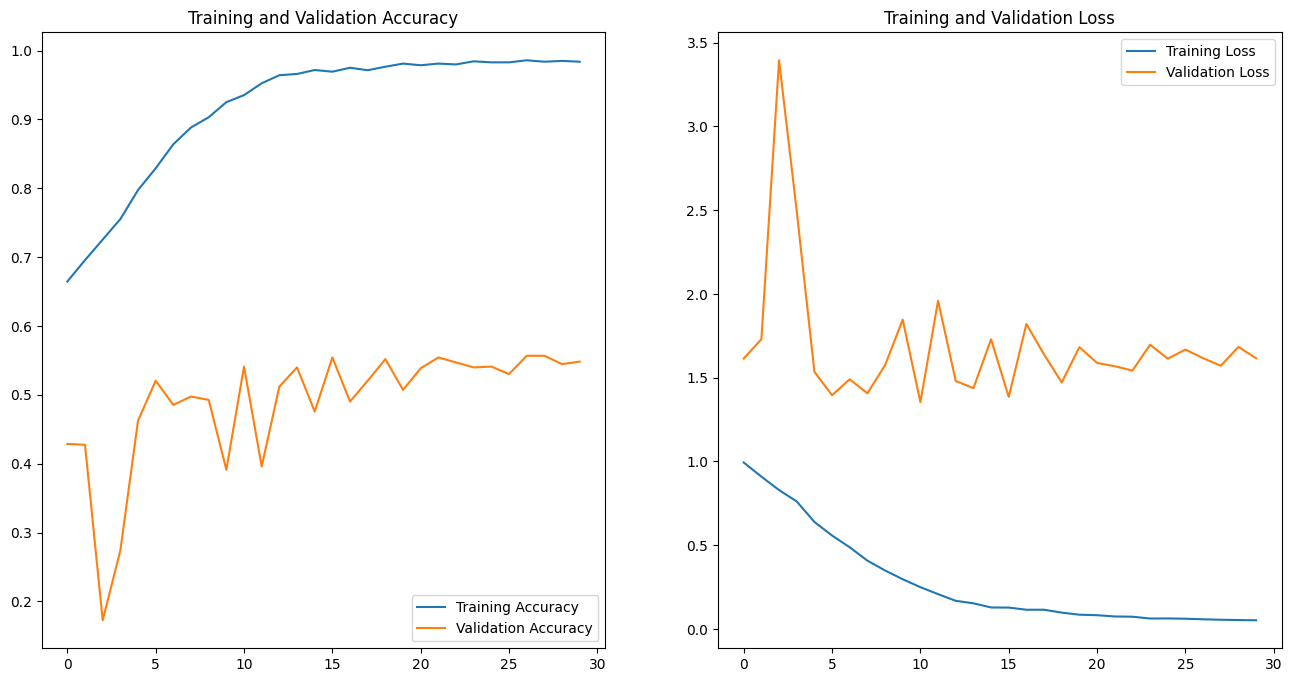

In [37]:
epochs_range = range(30)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [26]:
test_datagen = ImageDataGenerator(
        rescale=1./255,)

X_test = test_datagen.flow_from_directory(
        './SkinCancer/Test/',
        target_size=(180,180),
        batch_size=32,
        class_mode='categorical')

Found 118 images belonging to 9 classes.


In [27]:
predicted = model3.predict(X_test)

4/4 [==============================] - 5s 1s/step


## Remarks

#### In our case due to lack of resources, we don't go further to build deep CNN network, instead we build ``3 layered (Conv2D)`` CNN to get accuracy upto ``55%.``

#### There is still scope to increase the `Accuracy` of given CNN model.